In [50]:
import pandas as pd
import time
import os

begin ='2016-02-05'
end = '2016-04-08'
geshu = 3

a = pd.read_excel('/Users/liuhuanshuo/Desktop/pool_date_new.xlsx')   
k = 0   
for i in range(327): 
    a.ix[k,0] = a.ix[k,0].strftime("%Y-%m-%d")
    k = k+1    
s = list(a['日期']).index(begin)
p = list(a['日期']).index(end)
a.ix[s,2] = 'F' #修改第一天的end 不卖出
a.ix[p,3] = 'F' #修改最后一天的select  不计算
t = a[s:p+1].reset_index(drop=True) #计算区间
t = t.fillna(0)  

riqi_list = t
jisuanriqi = riqi_list[riqi_list['select'] == 'T'] #选择计算日期
jisuanriqi = jisuanriqi.reset_index(drop=True)
print(jisuanriqi)

temp = pd.DataFrame(columns = ['代码','日期','市盈率','开盘价(元)','收盘价(元)']) #储存代码
for i in jisuanriqi['日期']:
    df_list = pd.read_excel('/Users/liuhuanshuo/Desktop/stocks_list.xlsx')
    temp1 = pd.DataFrame(columns = ['代码','日期','市盈率','开盘价(元)','收盘价(元)'])
    for file in df_list['股票代码']:
        excel_path = os.path.join('/Users','liuhuanshuo','desktop','作业','量化','单佳雷数据','沪A股票原始数据/') + file + '.xls'
        df = pd.read_excel(excel_path) 
        df_one = df.loc[:,['代码','日期','市盈率','开盘价(元)','收盘价(元)']]    #切片 提取指定列
        a = df_one[(df_one.日期 == i) & (df_one.市盈率 > 0)]  #选择特定行
        temp1 = temp1.append(a,ignore_index=True)    #将刚刚选取的行添加到数据框中
    temp1_sort = temp1.sort_values(by = '市盈率')  #排序
    s = temp1_sort.iloc[0:geshu]
    s = s.reset_index(drop=True)
    temp = temp.append(s,ignore_index=True)
    

goumaidaima = temp
print(goumaidaima)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


           日期 buy end select
0  2016-02-05   F   F      T
1  2016-02-19   F   T      T
2  2016-02-26   F   T      T
3  2016-03-04   F   T      T
4  2016-03-11   F   T      T
5  2016-03-18   F   T      T
6  2016-03-25   F   T      T
7  2016-04-01   F   T      T
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *

In [197]:

zhengchangriqi = t[t['buy'] == 0]
temp4 = pd.DataFrame(columns = ['代码','日期','开盘价(元)','市盈率','收盘价(元)'])
for i in zhengchangriqi['日期']:
    df_list = pd.read_excel('/Users/liuhuanshuo/Desktop/stocks_list.xlsx')
    for file in goumaidaima[0:geshu].代码:
        excel_path = os.path.join('/Users','liuhuanshuo','desktop','作业','量化','单佳雷数据','沪A股票原始数据/') + file + '.xls'
        df = pd.read_excel(excel_path) 
        df_one = df.loc[:,['代码','日期','开盘价(元)','市盈率','收盘价(元)']]    #切片 提取指定列
        a = df_one[(df_one.日期 == i) & (df_one.市盈率 > 0)]  #选择特定行
        temp4 = temp4.append(a,ignore_index=True)
temp4

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

,代码,日期,开盘价(元),市盈率,收盘价(元)
0,600015.SH,2016-02-16,9.0141,5.4155,9.2262
1,600016.SH,2016-02-16,8.1436,6.7889,8.2591
2,600000.SH,2016-02-16,16.2946,6.8010,16.2946
3,600015.SH,2016-02-17,9.1972,5.4551,9.2937
4,600016.SH,2016-02-17,8.2495,6.7731,8.2399
5,600000.SH,2016-02-17,16.2946,6.8010,16.2946
6,600015.SH,2016-02-18,9.3226,5.4268,9.2454
7,600016.SH,2016-02-18,8.2784,6.7968,8.2687
8,600000.SH,2016-02-18,16.2946,6.8010,16.2946
9,600015.SH,2016-02-23,9.4093,5.4721,9.3226


In [132]:
maichudaima = riqi_list[riqi_list['end'] == 'T']
temp2 = pd.DataFrame(columns = ['代码','日期','开盘价(元)','市盈率','收盘价(元)'])
for i in maichuriqi['日期']:
    df_list = pd.read_excel('/Users/liuhuanshuo/Desktop/stocks_list.xlsx')
    for file in goumaidaima[0:geshu].代码:
        excel_path = os.path.join('/Users','liuhuanshuo','desktop','作业','量化','单佳雷数据','沪A股票原始数据/') + file + '.xls'
        df = pd.read_excel(excel_path) 
        df_one = df.loc[:,['代码','日期','开盘价(元)','市盈率','收盘价(元)']]    #切片 提取指定列
        a = df_one[(df_one.日期 == i) & (df_one.市盈率 > 0)]  #选择特定行
        temp2 = temp2.append(a,ignore_index=True)
temp2

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

,代码,日期,开盘价(元),市盈率,收盘价(元)
0,600015.SH,2016-02-19,9.2358,5.3985,9.1972
1,600016.SH,2016-02-19,8.2206,6.7335,8.1917
2,600000.SH,2016-02-19,16.2946,6.8010,16.2946
3,600015.SH,2016-02-26,8.9562,5.2797,8.9948
4,600016.SH,2016-02-26,7.9515,6.5753,8.0680
5,600000.SH,2016-02-26,16.2946,6.8010,16.2946
6,600015.SH,2016-03-04,9.3901,5.8116,9.9010
7,600016.SH,2016-03-04,8.3981,7.3824,9.0583
8,600000.SH,2016-03-04,16.2946,6.8010,16.2946
9,600015.SH,2016-03-11,9.5732,5.7211,9.7468


In [147]:
mairuriqi = riqi_list[riqi_list['buy'] == 'T']
temp3 = pd.DataFrame(columns = ['代码','日期','开盘价(元)','市盈率','收盘价(元)'])
for i in mairuriqi['日期']:
    df_list = pd.read_excel('/Users/liuhuanshuo/Desktop/stocks_list.xlsx')
    for file in goumaidaima[0:geshu].代码:
        excel_path = os.path.join('/Users','liuhuanshuo','desktop','作业','量化','单佳雷数据','沪A股票原始数据/') + file + '.xls'
        df = pd.read_excel(excel_path) 
        df_one = df.loc[:,['代码','日期','开盘价(元)','市盈率','收盘价(元)']]    #切片 提取指定列
        a = df_one[(df_one.日期 == i) & (df_one.市盈率 > 0)]  #选择特定行
        temp3 = temp3.append(a,ignore_index=True)
temp3

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

,代码,日期,开盘价(元),市盈率,收盘价(元)
0,600015.SH,2016-02-15,9.0237,5.2627,8.9659
1,600016.SH,2016-02-15,8.0281,6.6940,8.1436
2,600000.SH,2016-02-15,15.8795,6.8010,16.2946
3,600015.SH,2016-02-22,9.2551,5.5570,9.4672
4,600016.SH,2016-02-22,8.2591,6.8048,8.2784
5,600000.SH,2016-02-22,16.2946,6.8010,16.2946
6,600015.SH,2016-02-29,8.9852,5.2684,8.9755
7,600016.SH,2016-02-29,8.0194,6.6861,8.2039
8,600000.SH,2016-02-29,16.2946,6.8010,16.2946
9,600015.SH,2016-03-07,9.8046,5.7211,9.7468


In [212]:
keyongzijin = 1000000
chigujiazhi = 0
keyongzijin_1 = []
chigujiazhi_new = []
l = 0
chigushuliang = []  #存储持股数量
for i in range(len(riqi_list)):
    if  (riqi_list.ix[i,1] == 'F' and riqi_list.ix[i,2] == 'F'):
        keyongzijin_1.append(keyongzijin)
        chigujiazhi_new.append(chigujiazhi)
        
    elif (riqi_list.ix[i,1] == 'T' and riqi_list.ix[i,2] == 'F'):
        goumaizijin = keyongzijin/geshu #第一次100万
        for l in range(geshu):
            chigushuliang_1 = (goumaizijin/temp3.ix[l,2])
            chigushuliang.append(chigushuliang_1)
        chigujiazhi_1 =[]
        for nn in range(geshu):
            chigujiazhi_2 = chigushuliang[nn] * temp3.ix[l,2] 
            chigujiazhi_1.append(chigujiazhi_2)
        chigujiazhi = sum(chigujiazhi_1)
        keyongzijin = 0 #第一次买完变成0
        
        keyongzijin_1.append(keyongzijin)
        chigujiazhi_new.append(chigujiazhi)
        
    elif (riqi_list.ix[i,1] == 'F' and riqi_list.ix[i,2] == 'T'):
        chigujiazhi = 0
        chucunzijin = []
        for y in range(geshu):
            keyongzijin_2 = chigushuliang[y] * temp2.ix[y,4]
            chucunzijin.append(keyongzijin_2)
        keyongzijin = sum(chucunzijin)
        keyongzijin_1.append(keyongzijin)
        chigujiazhi_new.append(chigujiazhi)
        
    else:
        keyongzijin_1.append(keyongzijin)
        chigujiazhi_.append(chigujiazhi)
        
c={"可用资金" : keyongzijin_1,
   "持股价值" : chigujiazhi_new}
data1=DataFrame(c)
data1.insert(0,'日期',t['日期'])
data1

NameError: name 'chigujiazhi_' is not defined

In [214]:
def jisuan():
    '用于计算策略轮动'
    
    keyongzijin = 1000000
    chigujiazhi = 0
    keyongzijin_1 = []
    chigujiazhi_1 = []
    l = 0
    chigushuliang = []  #存储持股数量
    pp = 0
    kk = 0
    gg = 0
    for i in range(len(riqi_list)):

        if (t.ix[i,1] == 'T' and t.ix[i,2] == 'F'):
            goumaizijin = keyongzijin/geshu #第一次100万

            for l in range(geshu):
                chigushuliang_1 = (goumaizijin/temp3.ix[l+pp,2])
                chigushuliang.append(chigushuliang_1)

            keyongzijin = 0 #第一次卖完变成0
            chigujiazhi = goumaizijin * geshu
            pp = pp + 3
            keyongzijin_1.append(keyongzijin)
            chigujiazhi_1.append(chigujiazhi)

        elif (t.ix[i,1] == 'F' and t.ix[i,2] == 'T'):
            chigujiazhi = 0
            chucunzijin = []
            for y in range(geshu):
                keyongzijin_2 = chigushuliang[y] * temp2.ix[y+kk,4]
                chucunzijin.append(keyongzijin_2)
            kk = kk + 3
            keyongzijin = sum(chucunzijin)
            keyongzijin_1.append(keyongzijin)
            chigujiazhi_1.append(chigujiazhi)

        elif (t.ix[i,1] == 0 and t.ix[i,2] == 0 and t.ix[i,3] == 0):
            xianyoujiazhi = []
            for z in range(geshu):
                xianyoujiazhi_1 = chigushuliang[z] * temp4.ix[z + gg,2]
                xianyoujiazhi.append(xianyoujiazhi_1)
            gg = gg + 3
            chigujiazhi = sum(xianyoujiazhi)
            keyongzijin_1.append(keyongzijin)
            chigujiazhi_1.append(chigujiazhi)
        else:
            keyongzijin_1.append(keyongzijin)
            chigujiazhi_1.append(chigujiazhi)

    c={"可用资金" : keyongzijin_1,
       "持股价值" : chigujiazhi_1}
    data1=DataFrame(c)
    data1.insert(0,'日期',t['日期'])
    data1

,日期,可用资金,持股价值
0,2016-02-05,1.000000e+06,0.000000e+00
1,2016-02-15,0.000000e+00,1.000000e+06
2,2016-02-16,0.000000e+00,1.013155e+06
3,2016-02-17,0.000000e+00,1.024315e+06
4,2016-02-18,0.000000e+00,1.030147e+06
5,2016-02-19,1.021915e+06,0.000000e+00
6,2016-02-22,0.000000e+00,1.021915e+06
7,2016-02-23,0.000000e+00,1.032549e+06
8,2016-02-24,0.000000e+00,1.023439e+06
9,2016-02-25,0.000000e+00,1.026105e+06


In [198]:
t

,日期,buy,end,select
0,2016-02-05,F,F,T
1,2016-02-15,T,F,F
2,2016-02-16,0,0,0
3,2016-02-17,0,0,0
4,2016-02-18,0,0,0
5,2016-02-19,F,T,T
6,2016-02-22,T,F,F
7,2016-02-23,0,0,0
8,2016-02-24,0,0,0
9,2016-02-25,0,0,0


In [196]:
t

,日期,buy,end,select
0,2016-02-05,F,F,T
1,2016-02-15,T,F,F
2,2016-02-16,0,0,0
3,2016-02-17,0,0,0
4,2016-02-18,0,0,0
5,2016-02-19,F,T,T
6,2016-02-22,T,F,F
7,2016-02-23,0,0,0
8,2016-02-24,0,0,0
9,2016-02-25,0,0,0


In [92]:
goumairiqi = riqi_list[riqi_list['buy'] == 'T']
goumairiqi_1 = pd.DataFrame(columns = ['代码','日期','市盈率','开盘价(元)','收盘价(元)'])
for u in goumairiqi.日期:
    print(u)
    goumairiqi_2 = goumaidaima[goumaidaima.日期 == u]
    goumairiqi_1 = goumairiqi_1.append(goumairiqi_2,ignore_index=True)
goumairiqi_1

2016-02-15
2016-02-22
2016-02-29
2016-03-07
2016-03-14
2016-03-21
2016-03-28
2016-04-05


,代码,日期,市盈率,开盘价(元),收盘价(元)


In [114]:
data1

,日期,可用资金,持股价值
0,2016-02-05,10000000,0
1,2016-02-15,0,1000000
2,2016-02-16,0,1000000
3,2016-02-17,0,1000000
4,2016-02-18,0,1000000
5,2016-02-19,0,1000000
6,2016-02-22,0,1000000
7,2016-02-23,0,1000000
8,2016-02-24,0,1000000
9,2016-02-25,0,1000000


In [38]:
a = [4,6,8]
b = [3,4,5]
d = [6,6,6]

In [42]:
c={"可用资金" : a,
   "持股价值" : b,
   "追加一行":d}
data1=DataFrame(c)

In [7]:
from pandas.core.frame import DataFrame
import pandas as pd

In [20]:
data1['结果'] = data1.apply(lambda x:data1.iloc[:,[0,1]].sum())

In [48]:
data1
data1['total'] = data1['可用资金']+data1['持股价值']
data1

,可用资金,持股价值,追加一行,total
0,4,3,6,7
1,6,4,6,10
2,8,5,6,13


In [31]:
data1.loc['_sum'] =data1.apply(lambda x: x.sum(),axis=1)

In [41]:
data1['Col_sum'] = data1.apply(lambda x: data1.iloc[[0,1],:].sum(), axis=1)

ValueError: Wrong number of items passed 3, placement implies 1

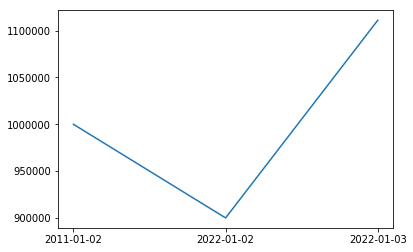

In [52]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
%matplotlib inline
a = ['2011-01-02','2022-01-02','2022-01-03']
b = [1000000,900000,1111111]
plt.plot(a,b)